## Configurações

-   1 - Instalação das dependências necessárias localmente utilizando pip

Shell Script

In [ ]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

PowerShell

In [ ]:
pip3 install pandas numpy matplotlib seaborn

##   Importação das bibliotecas

In [75]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

---
##   1 - Coletar de dados 

Capturando o conjunto de dados possuindo as informações necessárias.

Definição de um conjunto de parâmetros para a solicitação de download de um arquivo CSV, especificando o hash do arquivo, o diretório de destino e o nome do arquivo.

In [76]:
params = {
    "hash": '1oO3Q_2gIMQcdxj7D0ZqT0UaWYjLIgFQq_tWva_Qhn0I',
    "dst": '../assets/',
    "filename": 'data.csv',
}

Obtendo dados da planilha do Google Sheets, os carregando em um DataFrame do Pandas e, opcionalmente, os salva como um arquivo CSV localmente.

In [77]:
def get_data( hash: str, dst: str, filename: str, save = False ):
    url = f""" https://docs.google.com/spreadsheets/d/{hash}/export?format=csv """
    df = pd.read_csv( url )

    if save:
        df.to_csv( f"""{ dst }/{ filename }""" )

    return df

df_empreg = get_data( **params )

-   Replace nas universidades para se tornarem apenas siglas

Salvamento do arquivo


In [78]:
file_creator = get_data( **{ **params, "save": True } )

---
##  2 -  Tratamento dos dados

-   Separando colunas numéricas e de strings para tratamentos posteriores

TRATAR DADOS PARA MOSTRAR SOMENTE ABREVISTURA DA UNIVERSIDADE

In [79]:
cols_str = [
    'Nome',
    'Estado',
    'Cidade',
    'Etnia',
    'Universidade',
    'Curso',
    'StatusEmpregaticio',
    'FonteEmprego',
    'TraineeEstag',
    'MaiorDificuldadeEmprego',
    'SeEmpregado',
    'AreaTrabalho',
    'ModoTrabalho',
    'OpiniaoFaculdadeEmprego',
    'UniversidadeTipo'
]
cols_num = [
    'Id',
    'Idade',
    'SemestreAtual',
    'PretenSalarial'    
]

-   Transformando todas as strings em maiúsculas

In [80]:
df_empreg[ cols_str ] = df_empreg[ cols_str ].apply( lambda x: x.str.upper() )

-   Replace nas universidades para se tornarem apenas siglas

In [81]:
df_empreg['Universidade'] = df_empreg['Universidade'].replace({
    'UNIVERSIDADE FEDERAL DA BAHIA (UFBA)': 'UFBA',
    'FACULDADE DE ADMINISTRAÇÃO E TECNOLOGIA (FAT)': 'FAT',
    'UNIVERSIDADE CATÓLICA DO SALVADOR (UCSAL)': 'UCSAL',
    'UNIVERSIDADE SALVADOR (UNIFACS)': 'UNIFACS',
    'ESCOLA BAHIANA DE MEDICINA E SAÚDE PÚBLICA (EBMSP)': 'EBMSP',
    'CENTRO UNIVERSITÁRIO JORGE AMADO (UNIJORGE)': 'UNIJORGE',
    'FACULDADE DE TECNOLOGIA E CIÊNCIAS (FTC)': 'FTC',
    'FACULDADE RUY BARBOSA (FRB)': 'FRB',
    'UNIVERSIDADE DO ESTADO DA BAHIA (UNEB)': 'UNEB',
    'FACULDADE MAURÍCIO DE NASSAU (UNINASSAU)': 'UNINASSAU'
})

-   Ordenando os dados para melhor visualização com base na coluna de Id

In [82]:
df_empreg.sort_values( by= cols_num[0], ascending=True, inplace=True )

---
##   Overview

Informações importantes do dataframe

In [83]:
df_empreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1038 non-null   int64 
 1   Nome                     1038 non-null   object
 2   Estado                   1038 non-null   object
 3   Cidade                   1038 non-null   object
 4   Idade                    1038 non-null   int64 
 5   Etnia                    1038 non-null   object
 6   UniversidadeTipo         1038 non-null   object
 7   Universidade             1038 non-null   object
 8   Curso                    1038 non-null   object
 9   SemestreAtual            1038 non-null   int64 
 10  StatusEmpregaticio       1038 non-null   object
 11  FonteEmprego             497 non-null    object
 12  TraineeEstag             1038 non-null   object
 13  MaiorDificuldadeEmprego  955 non-null    object
 14  SeEmpregado              433 non-null   

Informações de quantidade de dados e colunas

In [84]:
df_empreg.shape

(1038, 19)

Colunas do dataframe

In [85]:
df_empreg.columns

Index(['Id', 'Nome', 'Estado', 'Cidade', 'Idade', 'Etnia', 'UniversidadeTipo',
       'Universidade', 'Curso', 'SemestreAtual', 'StatusEmpregaticio',
       'FonteEmprego', 'TraineeEstag', 'MaiorDificuldadeEmprego',
       'SeEmpregado', 'AreaTrabalho', 'ModoTrabalho',
       'OpiniaoFaculdadeEmprego', 'PretenSalarial'],
      dtype='object')

Valores do dataframe

In [86]:
df_empreg.values

array([[1, 'CAMILA BATISTA DE CARVALHO', 'BAHIA', ..., 'PRESENCIAL',
        'INSATISFEITO', 752],
       [2, 'LUCAS VIEIRA DO NASCIMENTO', 'BAHIA', ..., nan, 'SATISFEITO',
        1182],
       [3, 'LUCIANA BORGES DE AQUINO SCHILIVE', 'BAHIA', ...,
        'PRESENCIAL', 'SATISFEITO', 1523],
       ...,
       [1036, 'DÁRIO JOSÉ MENDONÇA', 'BAHIA', ..., nan, 'SATISFEITO',
        1767],
       [1037, 'FÁBIO ALMEIDA COSTA', 'BAHIA', ..., nan, 'SATISFEITO',
        625],
       [1038, 'ISABELA OLIVEIRA ALMEIDA', 'BAHIA', ..., nan,
        'SATISFEITO', 1712]], dtype=object)

Quantidade de respostas

In [87]:
total_respostas = len(df_empreg)

Informações de métrica referente aos valores numéricos do Dataframe

In [88]:
df_empreg.describe()

,Id,Idade,SemestreAtual,PretenSalarial
count,1038.000000,1038.000000,1038.000000,1038.000000
mean,519.500000,22.268786,6.769750,1280.411368
std,299.789093,4.141193,3.439513,414.836731
min,1.000000,18.000000,1.000000,600.000000
25%,260.250000,20.000000,4.000000,903.750000
50%,519.500000,22.000000,7.000000,1279.000000
75%,778.750000,24.000000,10.000000,1639.750000
max,1038.000000,45.000000,12.000000,1997.000000


#   ANÁLISE DESCRITIVA

Variáveis categóricas [etnia, universidade, curso, semestre, status empregatício, FonteEmprego, AreaTrabalho, ModoTrabalho, OpiniaoFaculdadeEmprego, PretenSalarial]  - gráfico de barra

####   Configuração geral dos gráficos

In [89]:
plt.rcParams['figure.figsize'] = (20,6)
sns.set_theme(color_codes=True)

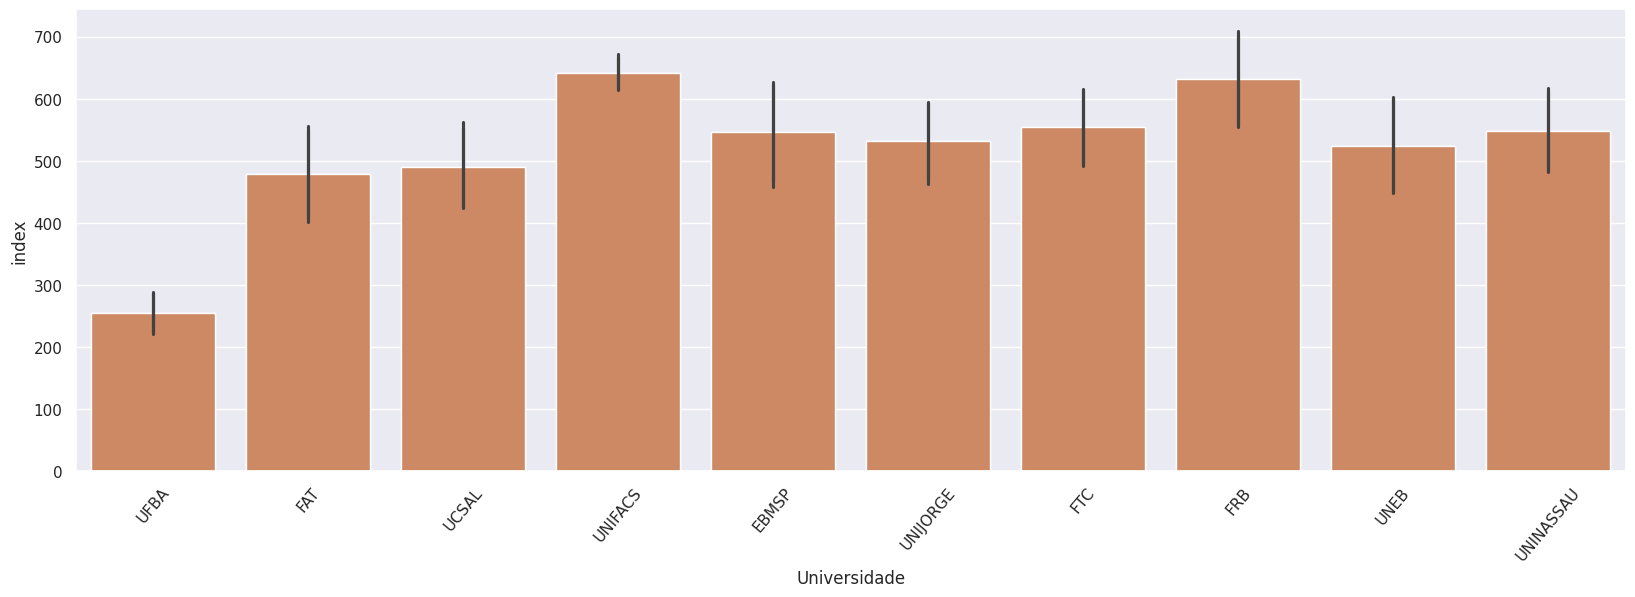

In [90]:
df_empreg['Universidade'].describe()
sns.barplot(data=df_empreg.reset_index(), x='Universidade', y='index')
plt.xticks(rotation=50);
sns.barplot(data=df_empreg.reset_index(), x='Universidade', y='index')
plt.xticks(rotation=50);

####    Quantidade de respostas por universitários na bahia

-   Com base em nossa análise, constatamos que a quantidade equivalente a 41.000 universitários atualmente na Bahia representam 0.27% da população atual conforme IBGE (15,13 Milhões) onde nossa pesquisa atingiu 2.53% da taxa dos universitários.
-   Fontes: 
-   https://www.ibge.gov.br/cidades-e-estados/ba/\
-   https://www.semesp.org.br/mapa/edicao-11/regioes/nordeste/bahia/#:~:text=Do%20total%20de%20alunos%20do,132%20mil%20na%20modalidade%20EAD.


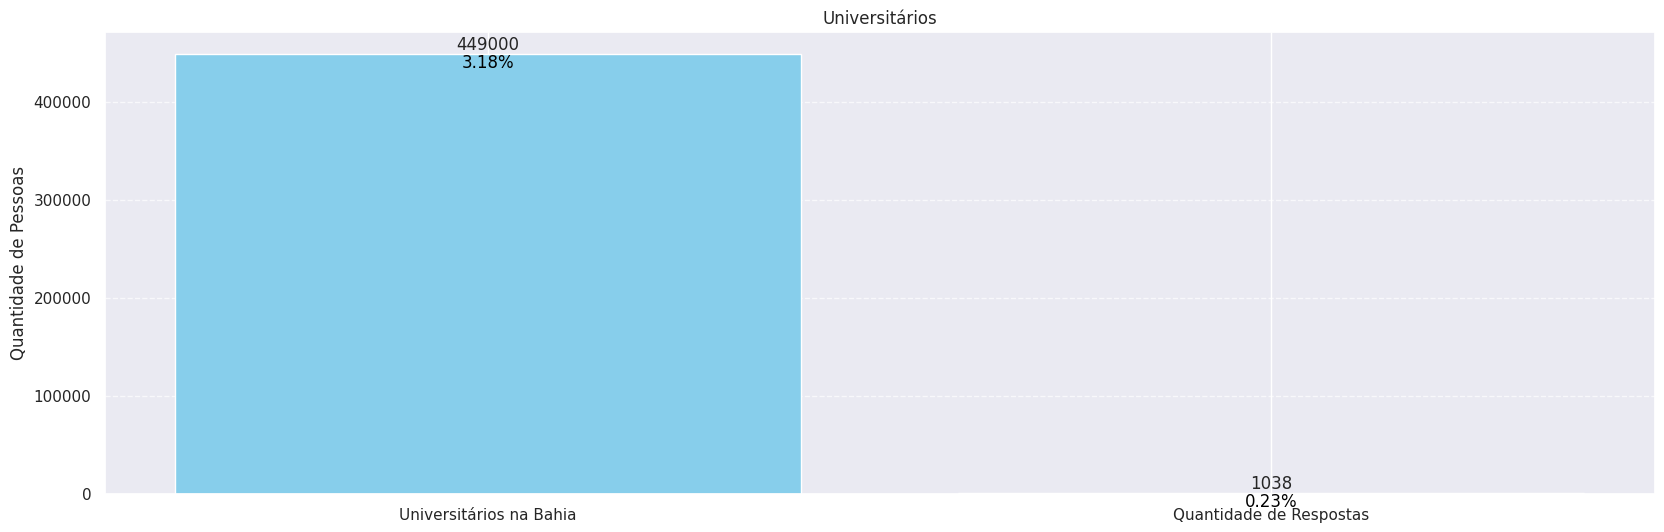

In [91]:
univ_bahia = 449000

populacao_bahia = 14141626

porcentagem_universitarios = (univ_bahia / populacao_bahia) * 100
quantidade_respostas = len(df_empreg)

porcentagem_respostas = (quantidade_respostas / univ_bahia) * 100

fig, ax = plt.subplots()
bars = ax.bar(['Universitários na Bahia', 'Quantidade de Respostas'], [univ_bahia, quantidade_respostas], color=['skyblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

ax.text(0, univ_bahia - 0.5, f'{porcentagem_universitarios:.2f}%', ha='center', va='top', color='black')
ax.text(1, quantidade_respostas - 0.5, f'{porcentagem_respostas:.2f}%', ha='center', va='top', color='black')

plt.title('Universitários')
plt.ylabel('Quantidade de Pessoas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###   Faixa Etária

-   Com a análise realizada, foi possível identificar que as respostas variam entre 18 a 45 anos.

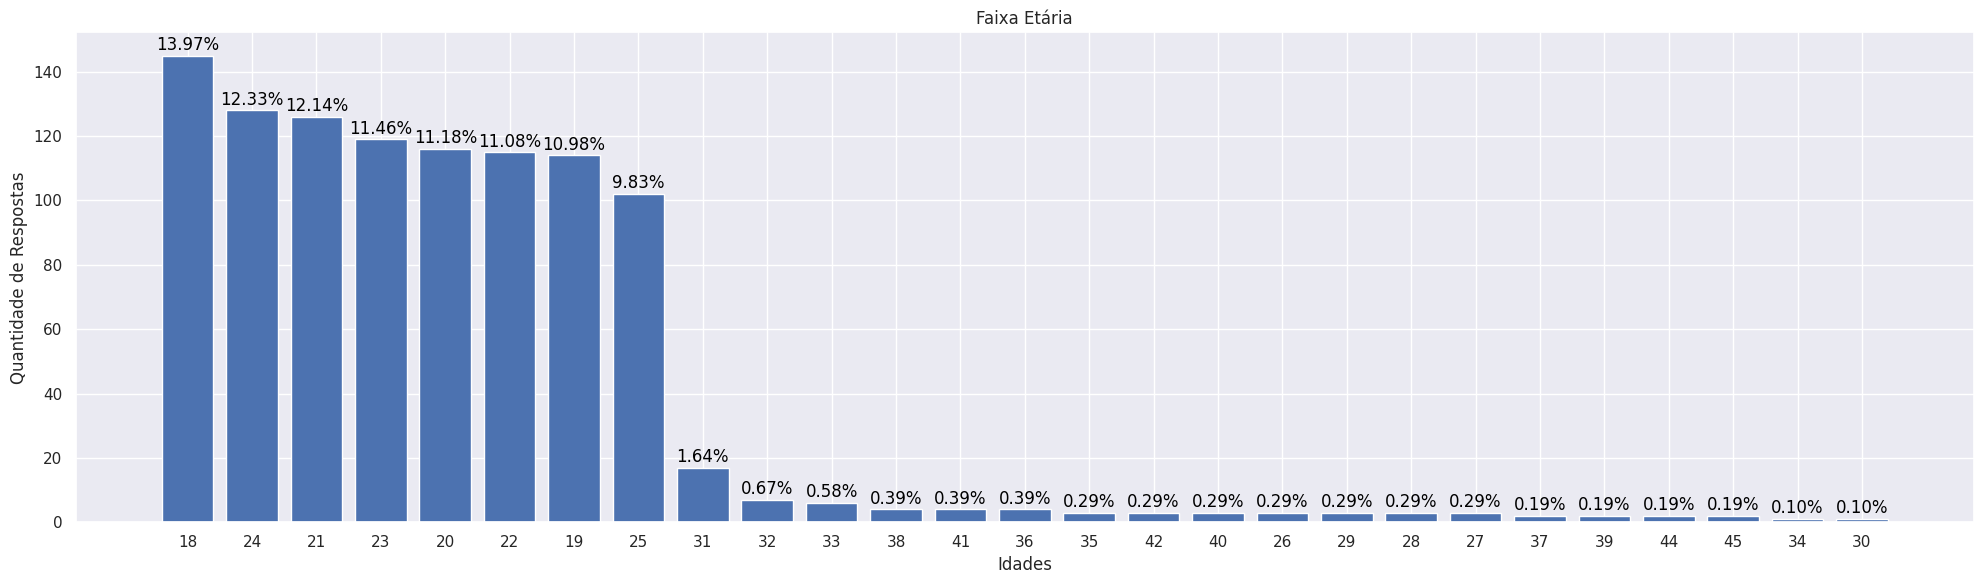

In [92]:
value_counts = df_empreg[cols_num[1]].value_counts()

porcentagem = (value_counts / total_respostas) * 100

bars = plt.bar(value_counts.index.astype(str), value_counts.values)

for i, (index, bar) in enumerate(zip(value_counts.index, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{porcentagem[index]:.2f}%', ha='center', va='bottom', color='black')

plt.title('Faixa Etária')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Respostas')
plt.grid(True)
plt.tight_layout()
plt.show()



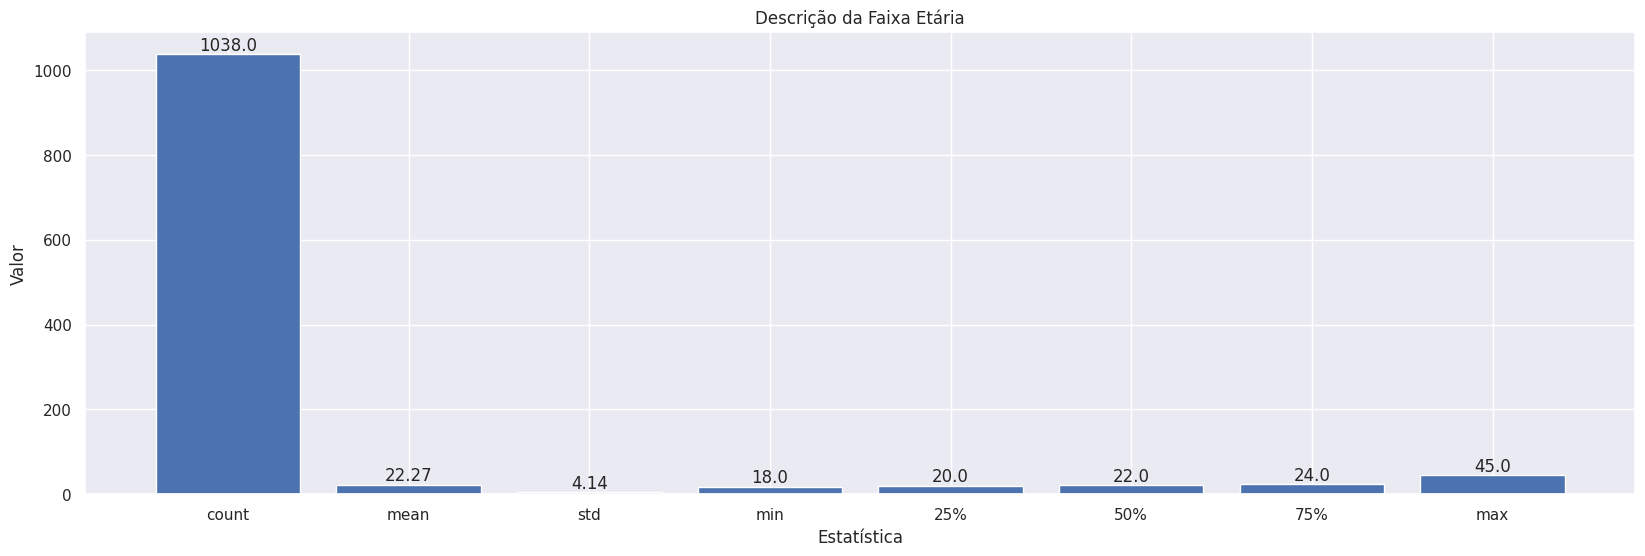

In [93]:
describe_df = df_empreg[cols_num[1]].describe()

bars = plt.bar(describe_df.index, describe_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Descrição da Faixa Etária')
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


-   Pessoas desempregadas por cidade

In [94]:
populacao_cidades = {
    'salvador': 2417678 , 
    'lauro de freitas': 201635,
    'simões filhos': 135783 ,
    'candeias': 72382
}

por_cidade = df_empreg[cols_str[2]].value_counts()

porcentagem_por_cidade = {}

for cidade, contagem_empregados in por_cidade.items():
    cidade_lower = cidade.lower()
    if cidade_lower in populacao_cidades:
        porcentagem_por_cidade[cidade] = (contagem_empregados / populacao_cidades[cidade_lower]) * 100
    else:
        porcentagem_por_cidade[cidade] = None

print("\nQuantidade de respostas por Cidade:")
print(por_cidade)
print("\nPorcentagem de respostas em relação à População por Cidade:")
for cidade, porcentagem in porcentagem_por_cidade.items():
    if porcentagem is not None:
        print(f"{cidade}: {porcentagem:.2f}%")
    else:
        print(f"{cidade}: População não encontrada")



Quantidade de respostas por Cidade:
Cidade
SALVADOR            925
LAURO DE FREITAS     86
SIMÕES FILHOS        21
CANDEIAS              6
Name: count, dtype: int64

Porcentagem de respostas em relação à População por Cidade:
SALVADOR: 0.04%
LAURO DE FREITAS: 0.04%
SIMÕES FILHOS: 0.02%
CANDEIAS: 0.01%


-   Porcentagem em relação a taxa de desemprego na Bahia

In [95]:
numero_empregados = df_empreg['Id'].count()

populacao_bahia = 14141626

taxa_desemprego_bahia = 13.2 / 100

porcentagem_empregados = (numero_empregados / populacao_bahia) * 100

porcentagem_relacao_desemprego = (porcentagem_empregados / (100 - taxa_desemprego_bahia)) * 100

print(f"A quantidade de respostas representa aproximadamente {porcentagem_relacao_desemprego:.2f}% da taxa de desemprego na Bahia.")


A quantidade de respostas representa aproximadamente 0.01% da taxa de desemprego na Bahia.


### Plataformas

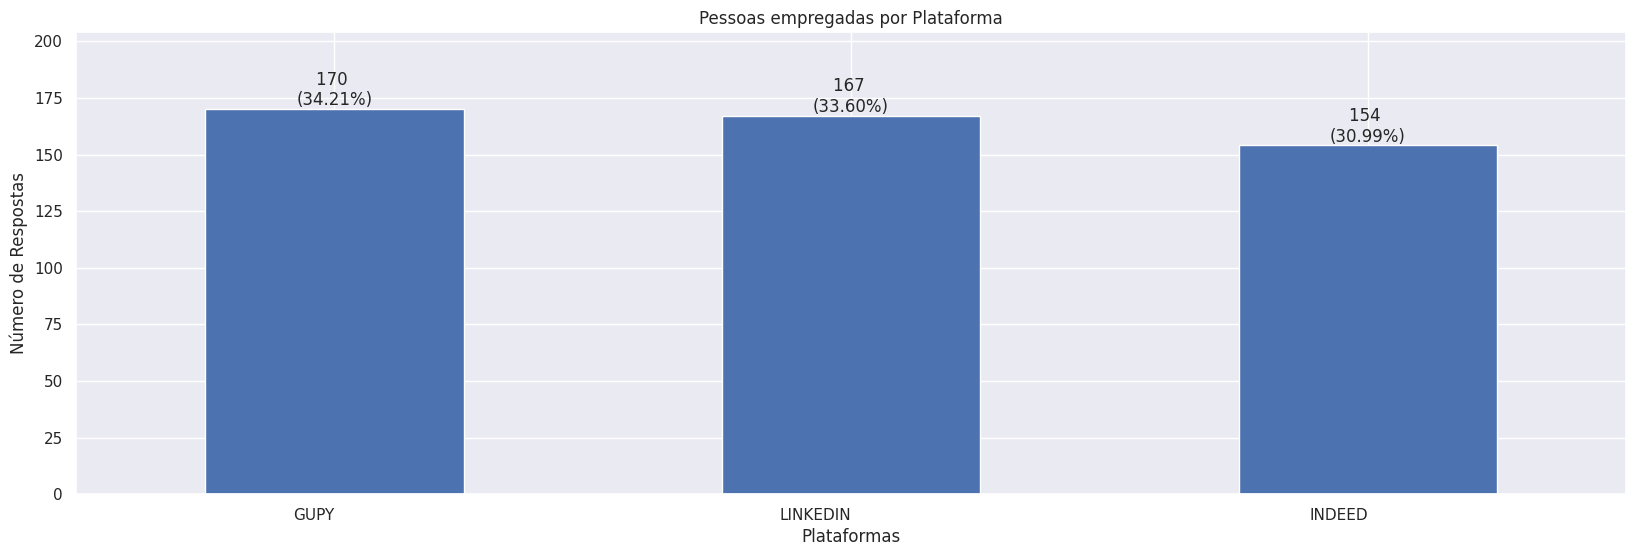

In [96]:
plataformas = df_empreg['FonteEmprego']

contagem_por_plat = plataformas.value_counts()

total_respostas_plat = contagem_por_plat.sum()

porcentagens_por_plat = contagem_por_plat[contagem_por_plat / total_respostas_plat * 100 > 1]

ax = porcentagens_por_plat.plot(kind='bar')
plt.xlabel('Plataformas')
plt.ylabel('Número de Respostas')
plt.title('Pessoas empregadas por Plataforma')
ax.set_ylim([0, contagem_por_plat.max()*1.20])

plt.xticks(rotation=0, ha='right')

for i in ax.patches:
    quantidade = i.get_height()
    porcentagem = quantidade / total_respostas_plat * 100
    plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
plt.show()


###  Semestre

-   Com a análise realizada, identificamos 10,12% das respostas, representando maioria da resposta é referente a alunos cursando o número máximo estipulado por semestre.

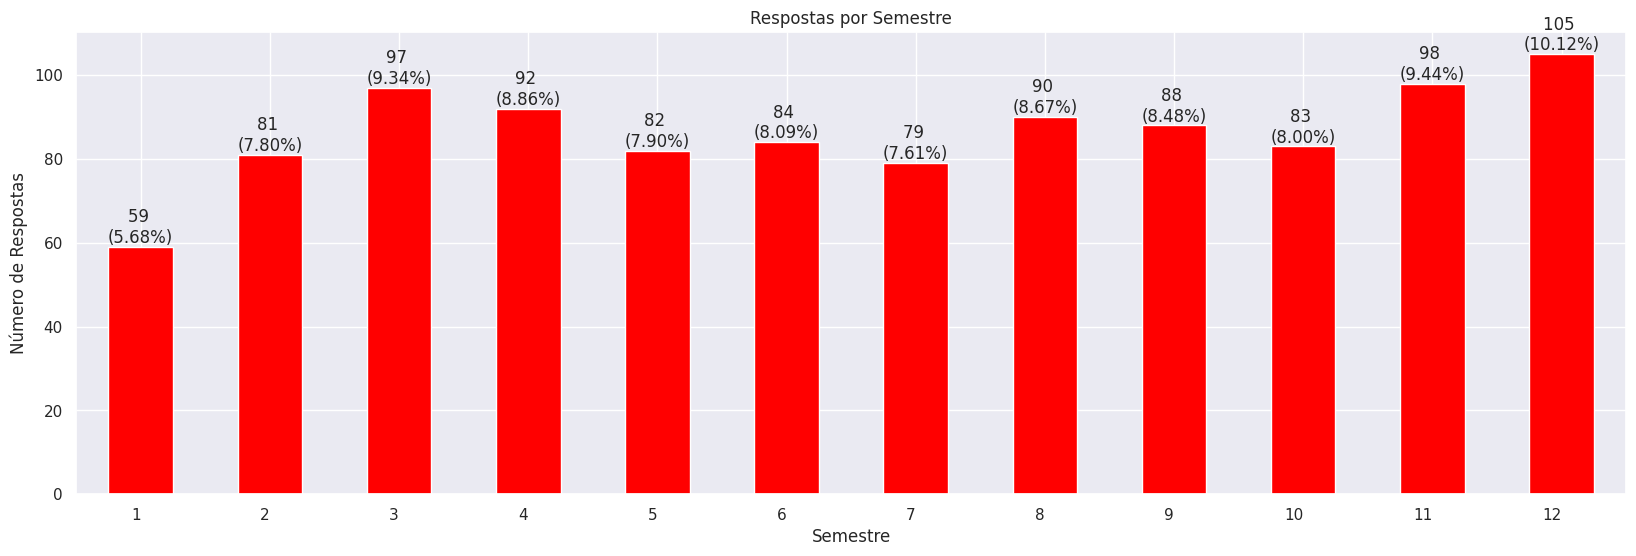

In [97]:
por_semestre = df_empreg[ 'SemestreAtual' ]

contagem_por_semestre = por_semestre.value_counts().sort_index()

total_respostas = contagem_por_semestre.sum()

ax = contagem_por_semestre.plot(kind='bar', color='red')
plt.xlabel('Semestre')
plt.ylabel('Número de Respostas')
plt.title('Respostas por Semestre')

plt.xticks(rotation=0, ha='right')
for i in ax.patches:
    quantidade = i.get_height()
    porcentagem = (quantidade / total_respostas) * 100
    plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
plt.show()

###  Curso

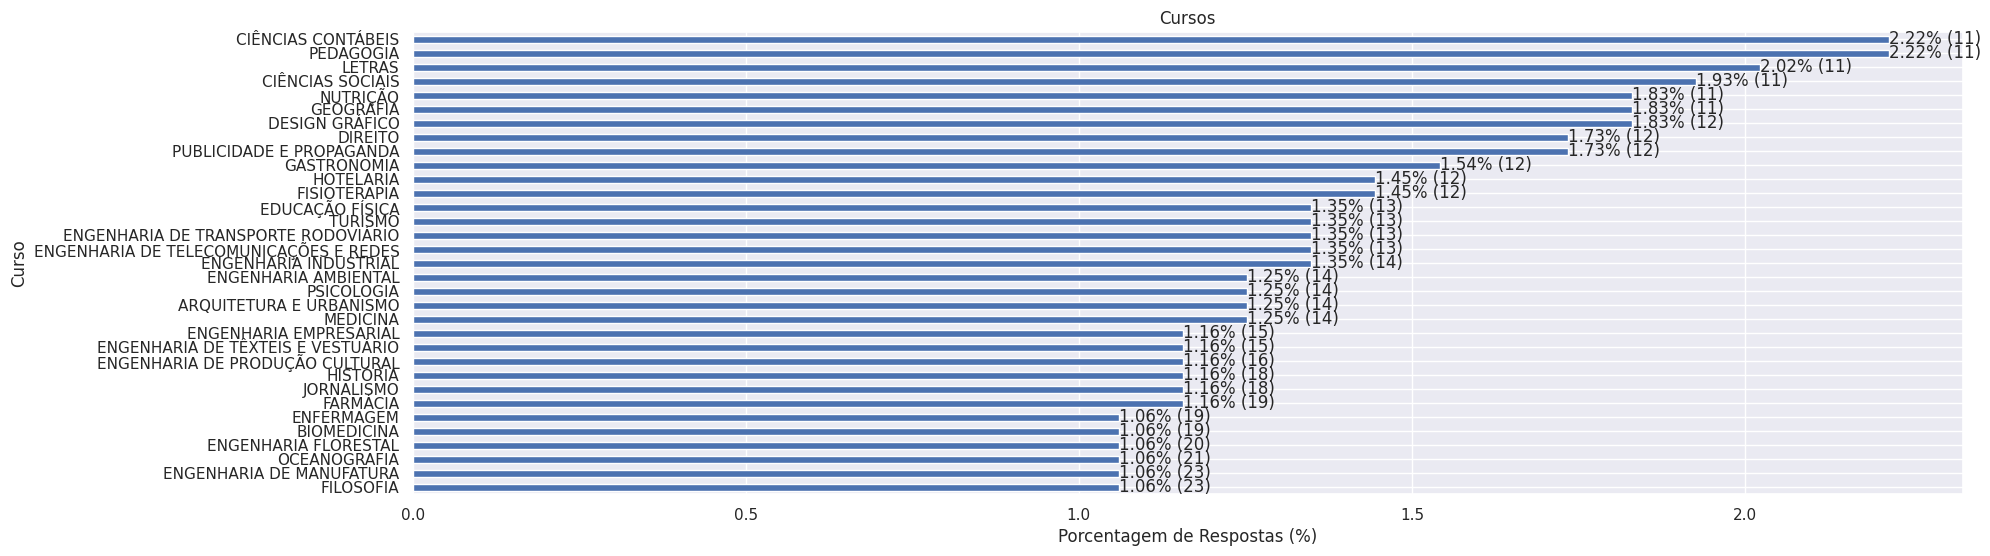

In [98]:
por_curso = df_empreg['Curso']
total_respostas = len(por_curso)

contagem_por_curso = por_curso.value_counts()
porcentagens_por_curso = (contagem_por_curso / total_respostas) * 100
porcentagens_por_curso = porcentagens_por_curso[porcentagens_por_curso > 1]
porcentagens_por_curso = porcentagens_por_curso.sort_values(ascending=True)

porcentagens_por_curso.plot(kind='barh')

for i in range(len(porcentagens_por_curso)):
    plt.text(porcentagens_por_curso.iloc[i], i, f'{porcentagens_por_curso.iloc[i]:.2f}% ({contagem_por_curso.iloc[i]})', ha='left', va='center')

plt.xlabel('Porcentagem de Respostas (%)')
plt.ylabel('Curso')
plt.title('Cursos')
plt.show()


### Etnia

-   Com a análise realizada, identificamos que a quantidade de negros desempregados em comparativo com a quantidade de respostas é de 67.7%.

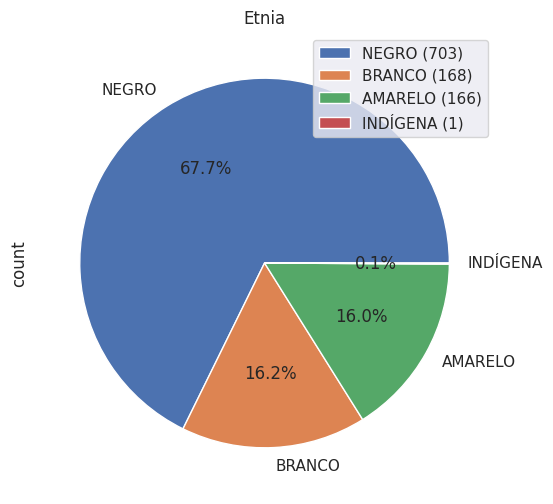

In [99]:
por_raca = df_empreg['Etnia']
por_raca.replace({'PARDO': 'NEGRO', 'PRETO': 'NEGRO'}, inplace=True)

contagem_por_raca = por_raca.value_counts()

contagem_por_raca.plot(kind='pie', autopct='%1.1f%%')
plt.title('Etnia')

plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_raca.items()], loc='best')
plt.show()

### Dificuldades

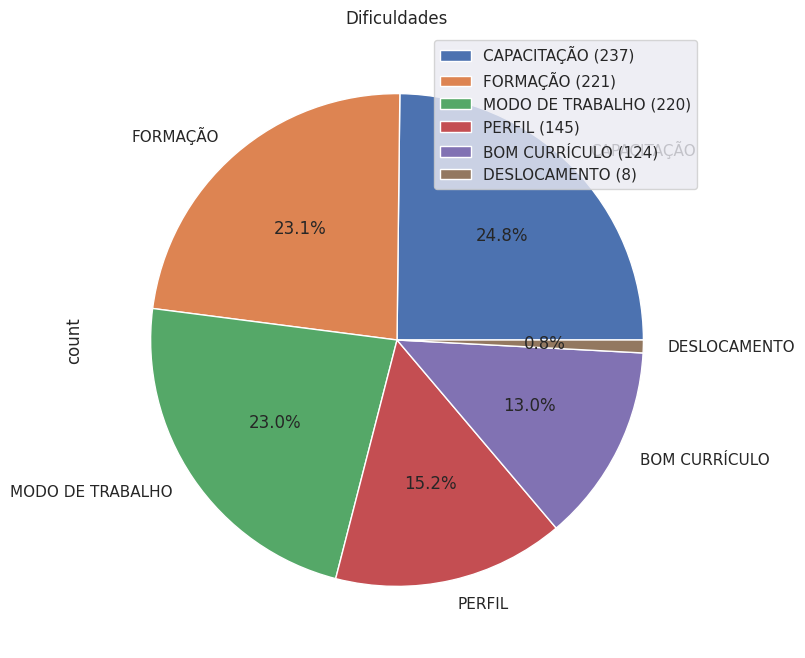

In [100]:
dificuldades = df_empreg['MaiorDificuldadeEmprego']

contagem_por_difi = dificuldades.value_counts()

plt.figure(figsize=(8, 8))
contagem_por_difi.plot(kind='pie', autopct='%1.1f%%')
plt.title('Dificuldades')

plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_difi.items()], loc='best')
plt.show()

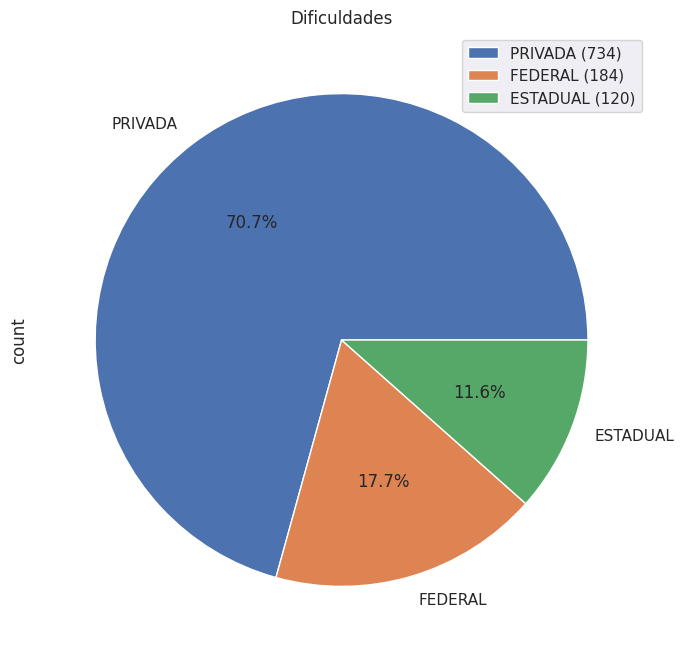

In [101]:
dificuldades = df_empreg['UniversidadeTipo']

contagem_por_difi = dificuldades.value_counts()

plt.figure(figsize=(8, 8))
contagem_por_difi.plot(kind='pie', autopct='%1.1f%%')
plt.title('Dificuldades')

plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_difi.items()], loc='best')
plt.show()

##  Distribuição de Idade por Etnia

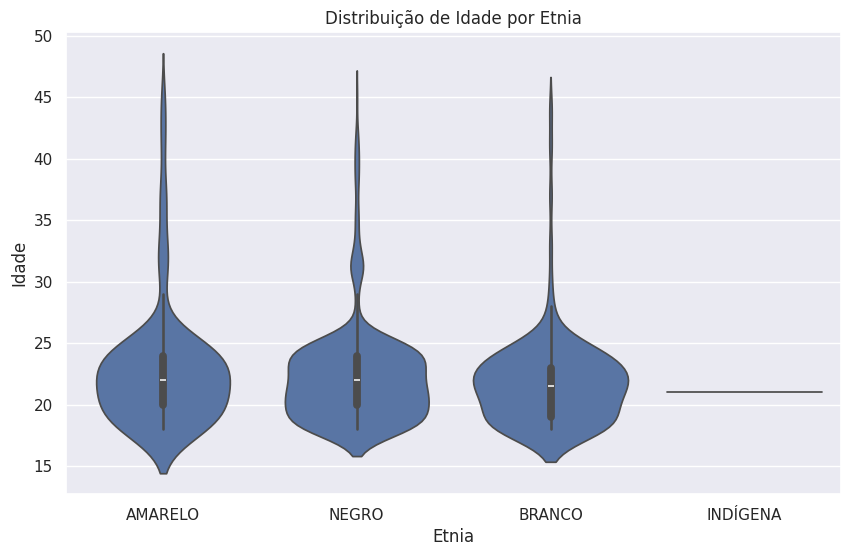

In [102]:
# Gráfico de violino para visualizar a distribuição da idade por etnia
plt.figure(figsize=(10, 6))
sns.violinplot(x='Etnia', y='Idade', data=df_empreg)
plt.title('Distribuição de Idade por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Idade')
plt.show()

##  Status Empregatício por Universidade Tipo

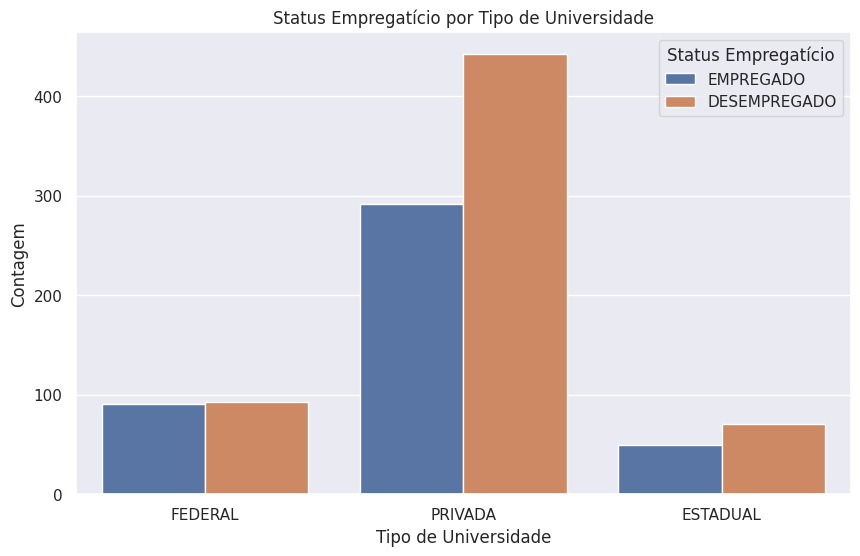

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='UniversidadeTipo', hue='StatusEmpregaticio', data=df_empreg)
plt.title('Status Empregatício por Tipo de Universidade')
plt.xlabel('Tipo de Universidade')
plt.ylabel('Contagem')
plt.legend(title='Status Empregatício')
plt.show()

##  Pretenção Salarial por Curso

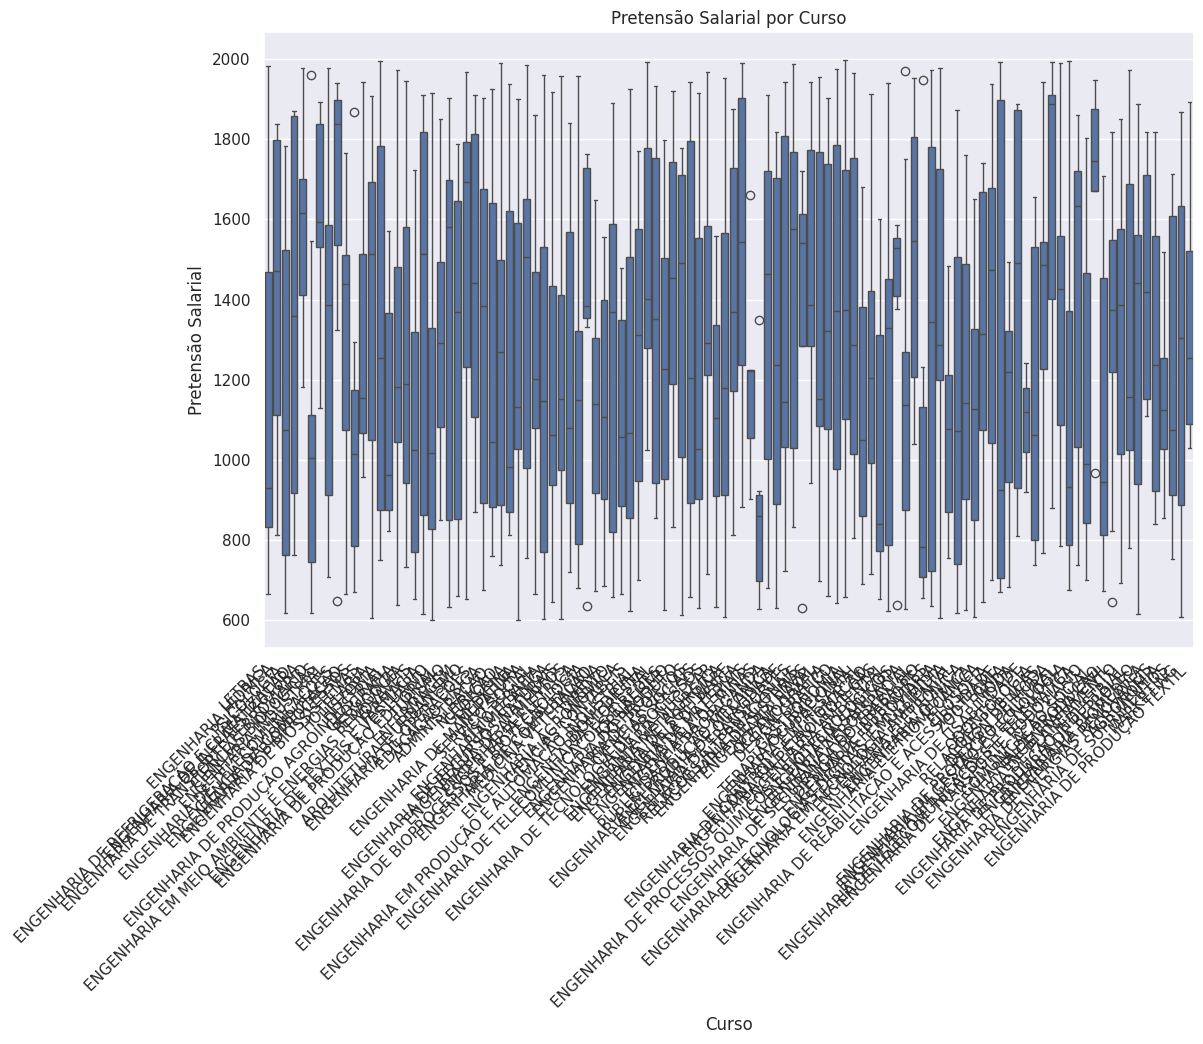

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Curso', y='PretenSalarial', data=df_empreg)
plt.title('Pretensão Salarial por Curso')
plt.xlabel('Curso')
plt.ylabel('Pretensão Salarial')
plt.xticks(rotation=45, ha='right')
plt.show()

##  Fonte de Emprego por Universidade

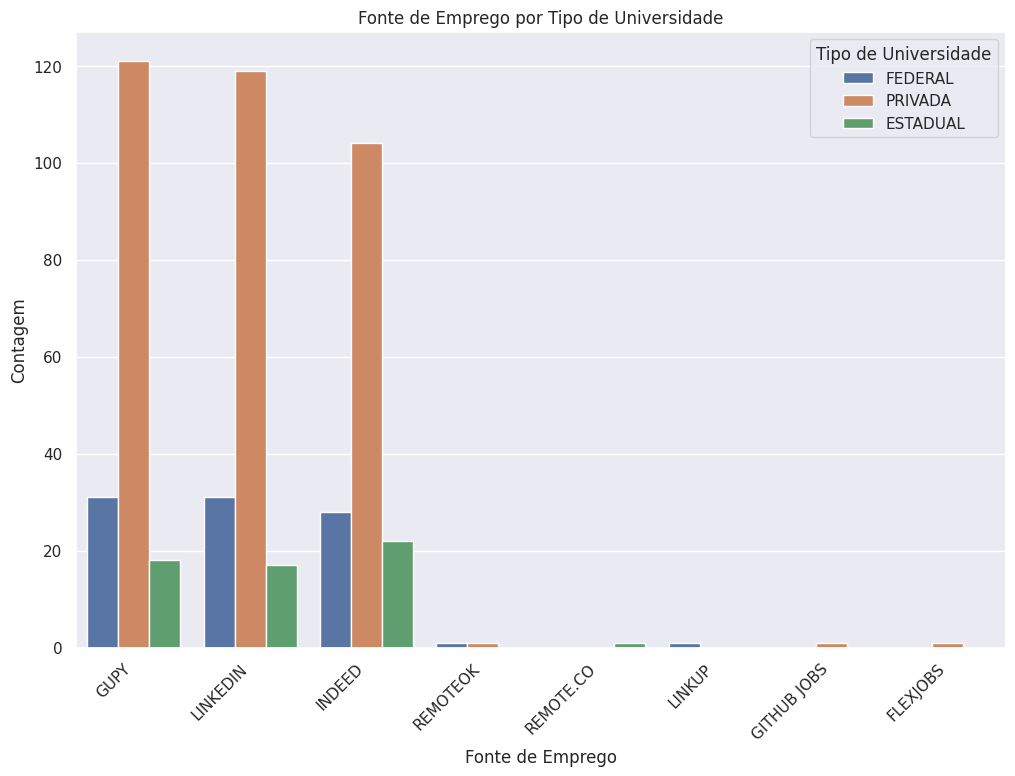

In [105]:
plt.figure(figsize=(12, 8))
sns.countplot(x='FonteEmprego', hue='UniversidadeTipo', data=df_empreg)
plt.title('Fonte de Emprego por Tipo de Universidade')
plt.xlabel('Fonte de Emprego')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Universidade')
plt.xticks(rotation=45, ha='right')
plt.show()

##  Distribuição do Status Empregatício por Curso

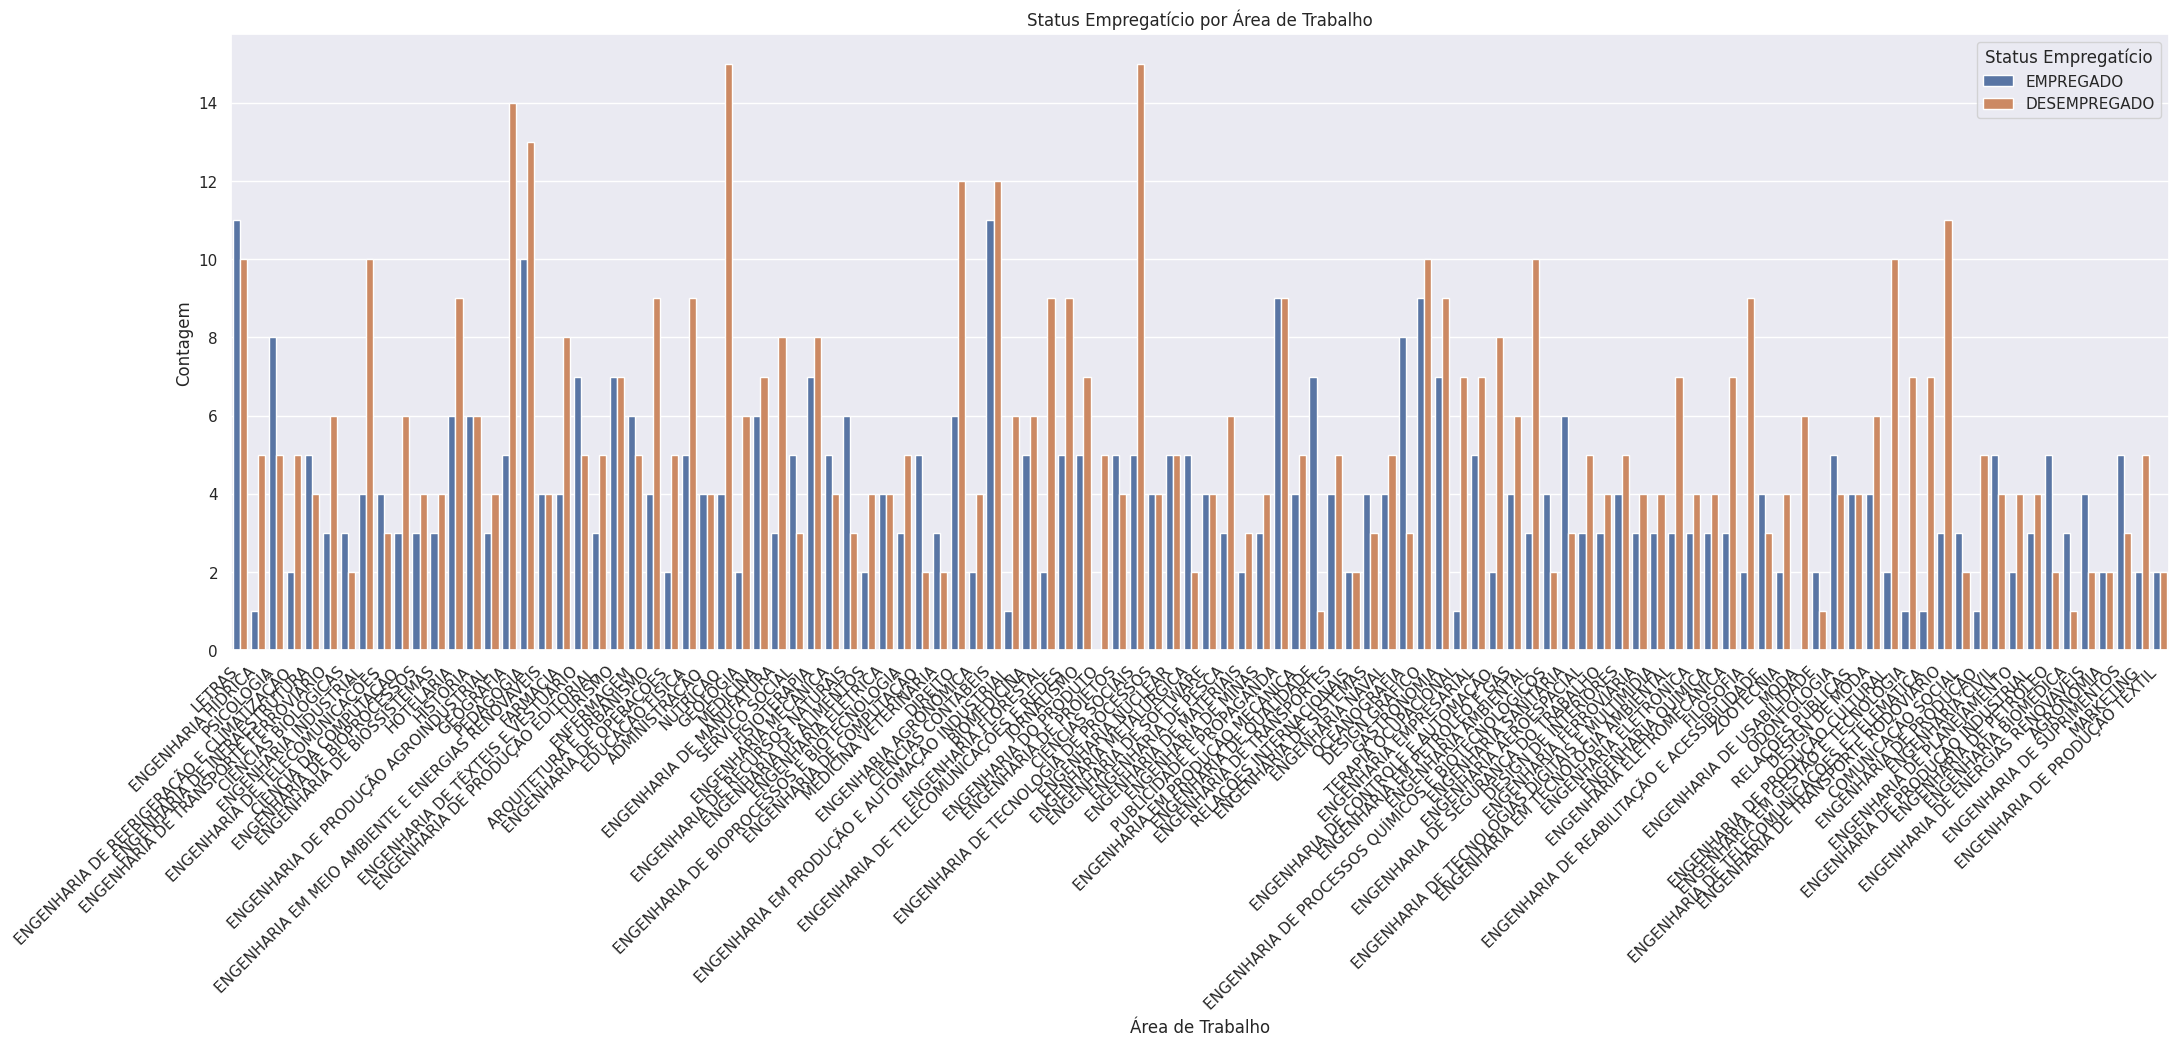

In [106]:
plt.figure(figsize=(25, 8))
sns.countplot(x='Curso', hue='StatusEmpregaticio', data=df_empreg)
plt.title('Status Empregatício por Área de Trabalho')
plt.xlabel('Área de Trabalho')
plt.ylabel('Contagem')
plt.legend(title='Status Empregatício')
plt.xticks(rotation=45, ha='right')
plt.show()

##  Distribuição da Opinião sobre a Faculdade e o Emprego por Tipo de Universidade

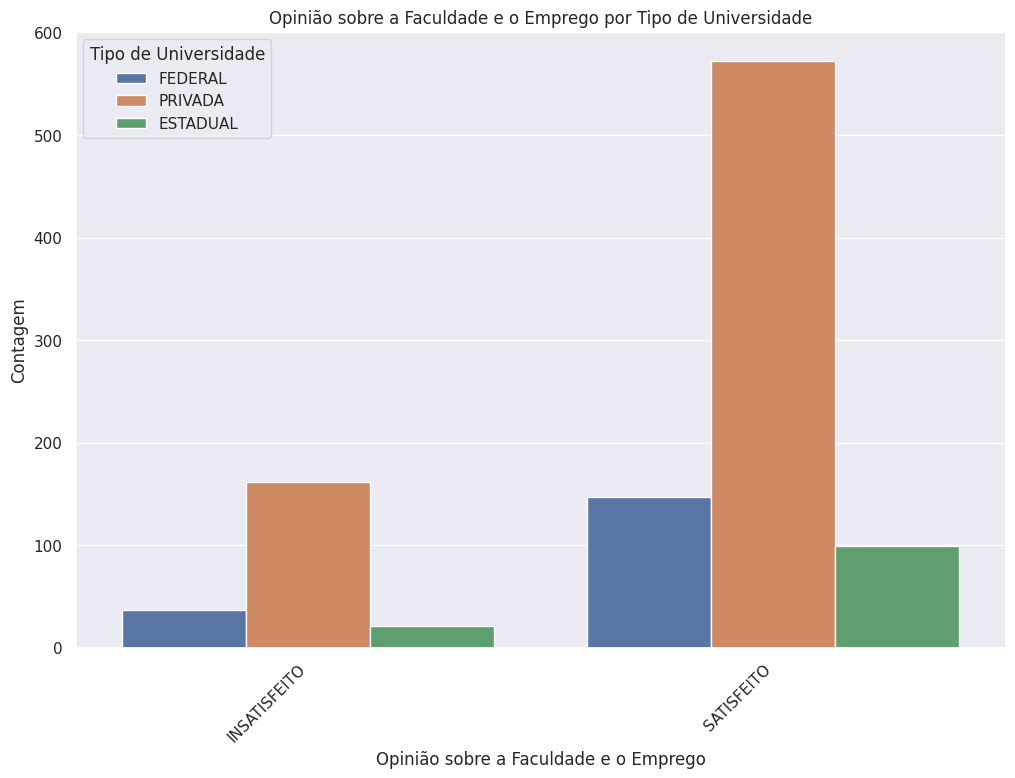

In [107]:
plt.figure(figsize=(12, 8))
sns.countplot(x='OpiniaoFaculdadeEmprego', hue='UniversidadeTipo', data=df_empreg)
plt.title('Opinião sobre a Faculdade e o Emprego por Tipo de Universidade')
plt.xlabel('Opinião sobre a Faculdade e o Emprego')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Universidade')
plt.xticks(rotation=45, ha='right')
plt.show()

##  Distribuição do Modo de Trabalho por Área de trabalho

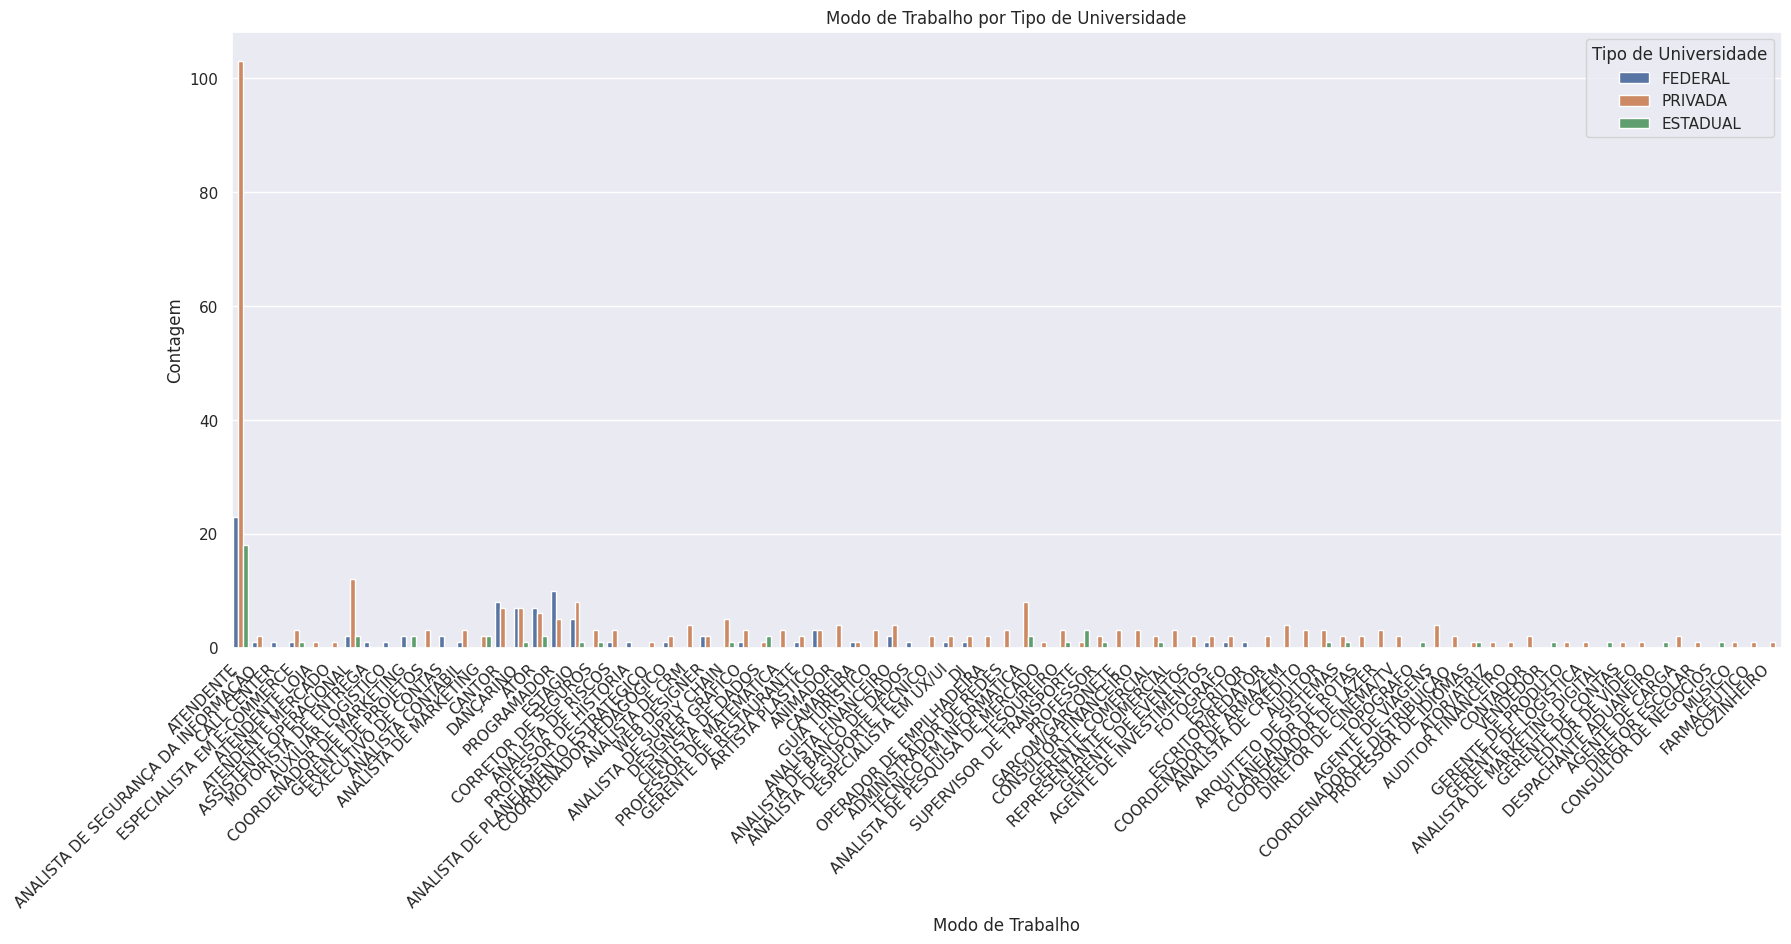

In [108]:
plt.figure(figsize=(20, 8))
sns.countplot(x='AreaTrabalho', hue='UniversidadeTipo', data=df_empreg)
plt.title('Modo de Trabalho por Tipo de Universidade')
plt.xlabel('Modo de Trabalho')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Universidade')
plt.xticks(rotation=45, ha='right')
plt.show()